In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [13]:
lambda_ = 15
d0 = 0.05
d1 = 0.25
K = 80
a = 0.054  # K: Threshold, a: Dilatation
gc = 0.052
alpha = 0.001
a1 = 0.01
a2, b2, n2 = 400, 2, 10
a3, b3, n3 = 80, 0.1, 10
a4 = 0.05
a5, b5, n5 = 20, 40, 10
ac, bc, nc = 30, 0.5, 2

# Conditions initiales
Dc0, Mc0, Ma0, Mn0 = 50, 0, 0, 0
A0, Ca0, Da0 = 30, 0, 0
initial_conditions = [Dc0, Mc0, Ma0, Mn0, A0, Ca0, Da0]

In [14]:
def model(X, t):
    Dc, Mc, Ma, Mn, A, Ca, Da = X

    # Définition des fonctions ki
    k1 = a1
    k2 = b2 * a2**n2 / (a2**n2 + Da**n2)
    k3 = b3 * a3**n3 / (a3**n3 + Da**n3)
    k4 = a4
    k5 = b5 * Ca**n5 / (a5**n5 + Ca**n5)

    # Système compartimental
    dDc_dt = (lambda_ - d0 * Dc + 0.5 * k1 * Mc**2 - gc * Dc) / a
    dMc_dt = (-k1 * Mc**2 - k2 * Mc + 2 * gc * Dc) / a
    dMa_dt = (k2 * Mc - k3 * Ma - k4 * A * Ma - k5 * Ma**2 + 2 * gc * Da + gc * Ca) / a
    dMn_dt = (k3 * Ma - d1 * Mn) / a
    dA_dt = (-k4 * Ma * A + gc * Ca) / a
    dCa_dt = (k4 * Ma * A - gc * Ca) / a
    dDa_dt = (0.5 * k5 * Ma**2 - gc * Da) / a

    return [dDc_dt, dMc_dt, dMa_dt, dMn_dt, dA_dt, dCa_dt, dDa_dt]

In [15]:
# Résolution de l'ODE
t = np.linspace(0, 4, 100)  # Intervalle de temps
solution = odeint(model, initial_conditions, t)

# Extraction des solutions
Dc, Mc, Ma, Mn, A, Ca, Da = solution.T
C = Ma + (2 * Da) + Ca

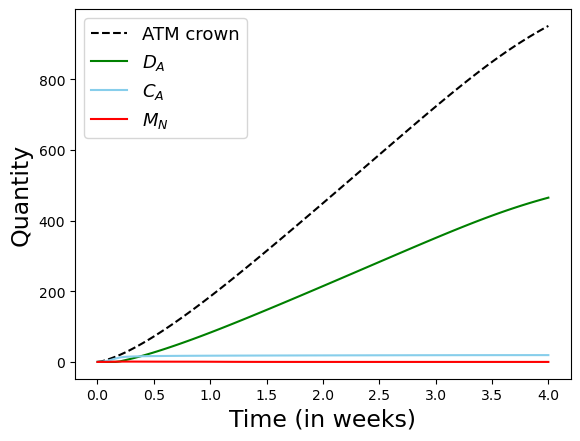

In [16]:
plt.figure(2)
plt.plot(t, C, '--', label="ATM crown", color="k")
plt.plot(t, Da, label="$D_A$", color="g")
plt.plot(t, Ca, label="$C_A$", color="skyblue")
plt.plot(t, Mn, label="$M_N$", color="r")
plt.xlabel("Time (in weeks)", fontsize=17)
plt.ylabel("Quantity", fontsize=17)
plt.legend(fontsize=13, loc="upper left")
plt.show()